In [1]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
from scipy import stats

In [3]:
#Ngarkimi i te dhenave
file_path ='dataset.csv'
df=pd.read_csv(file_path)
df

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.90%,NaN,drugo,N
2,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.80%,NaN,NaN,Y
3,30455,54844,Moški,DA,2 osebi,Diplomiral,NE,1066.666667,1.0,84xx,SI,1 leto,NAJEM,24500.0,90.0,3.26%,NaN,NaN,Y
4,935,18820,Moški,DA,2 osebi,Diplomiral,NaN,833.333333,1.0,60xx,SI,10+ let,STANOVANJSKI KREDIT,38150.0,90.0,3.26%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,NaN,DA,1 oseba,Diplomiral,NE,873.333333,1.0,14xx,SI,NaN,NAJEM,57750.0,90.0,2.89%,NaN,kartica,Y
38763,20271,32616,Moški,NE,0 oseb,Diplomiral,NE,3107.666667,1.0,63xx,Slo,3 leta,STANOVANJSKI KREDIT,17500.0,90.0,1.52%,Posojilojemalec je dodal na 02-06-14 > Samo o...,NaN,Y
38764,27733,46393,Ženska,DA,NaN,Diplomiral,DA,800.000000,0.0,42xx,SI,2 leti,LASTNO,58800.0,90.0,2.50%,NaN,NaN,N
38765,42707,20062,Moški,DA,3+ osebe,Diplomiral,NE,1365.000000,NaN,84xx,SI,3 leta,STANOVANJSKI KREDIT,43050.0,120.0,1.78%,NaN,NaN,Y


In [4]:
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38767 entries, 0 to 38766
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanID                  38767 non-null  int64  
 1   ApplicantID             38767 non-null  int64  
 2   ApplicantGender         37902 non-null  object 
 3   ApplicantMarried        38573 non-null  object 
 4   ApplicantDependents     37775 non-null  object 
 5   ApplicantEducation      38767 non-null  object 
 6   ApplicantSelfEmployed   36702 non-null  object 
 7   ApplicantIncome         38767 non-null  float64
 8   ApplicantCreditHistory  35687 non-null  float64
 9   ApplicantZIP            38767 non-null  object 
 10  ApplicantState          38767 non-null  object 
 11  ApplicantEmplLength     36924 non-null  object 
 12  ApplicantHomeOwn        38767 non-null  object 
 13  LoanAmount              37370 non-null  float64
 14  LoanTerm                37863 non-null

In [5]:
df.shape

(38767, 19)

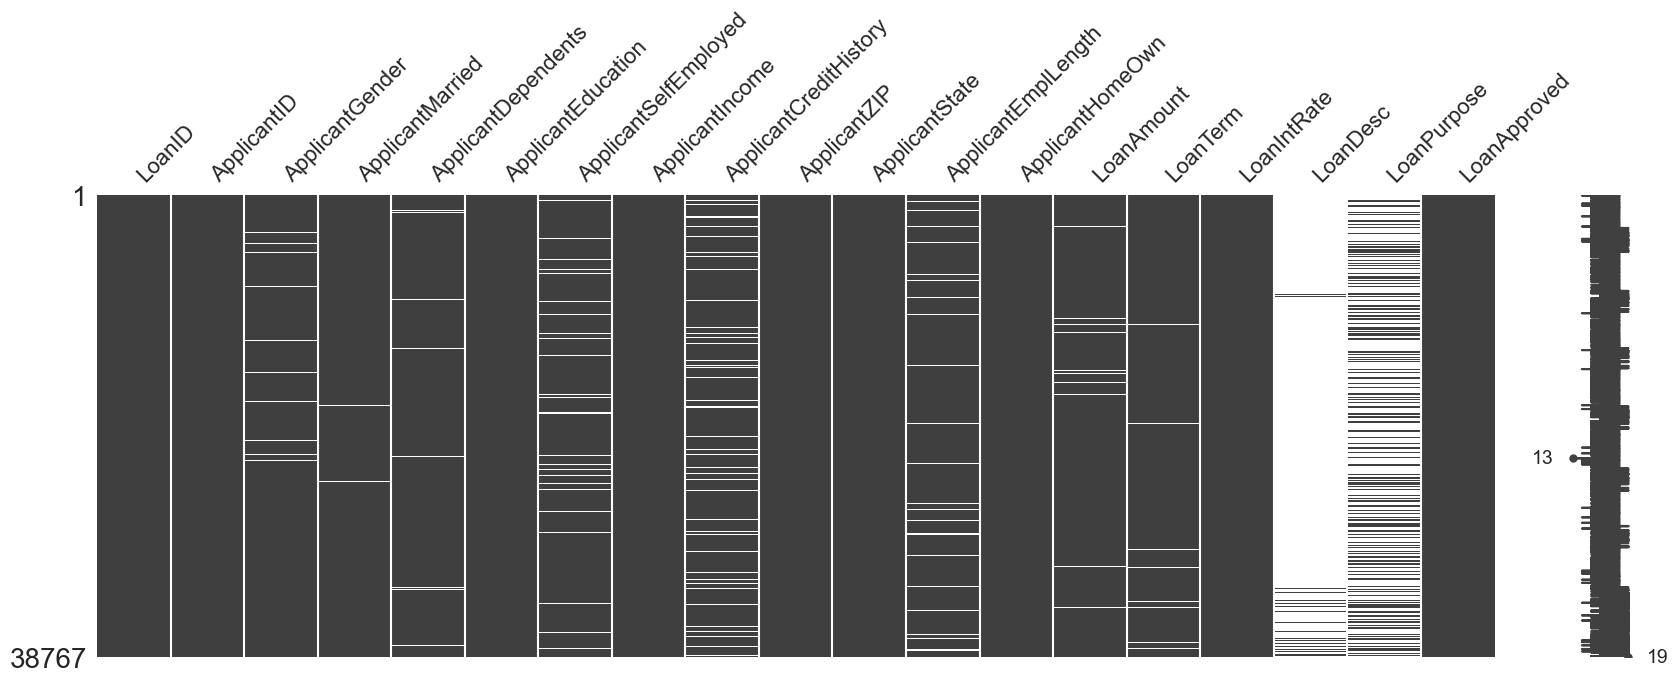

In [6]:
msno.matrix(df, figsize=(20, 6))
plt.show()

In [7]:
print(df.describe().T)

                          count          mean           std     min      25%  \
LoanID                  38767.0  34552.451441  19888.051126     1.0  17433.5   
ApplicantID             38767.0  34544.994918  19990.383285     1.0  17141.5   
ApplicantIncome         38767.0   1801.602781   2013.534166    50.0    963.0   
ApplicantCreditHistory  35687.0      0.842099      0.364653     0.0      1.0   
LoanAmount              37370.0  51087.712069  29882.568304  3150.0  35000.0   
LoanTerm                37863.0     85.473576     16.198891     3.0     90.0   

                            50%           75%       max  
LoanID                  34460.0  51691.000000   69133.0  
ApplicantID             34480.0  51847.500000   69134.0  
ApplicantIncome          1271.0   1933.333333   27000.0  
ApplicantCreditHistory      1.0      1.000000       1.0  
LoanAmount              44800.0  58450.000000  245000.0  
LoanTerm                   90.0     90.000000     120.0  


In [8]:
# llogarit perqindjen e rreshtave te dyfishte ne DataFrame
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


<Axes: >

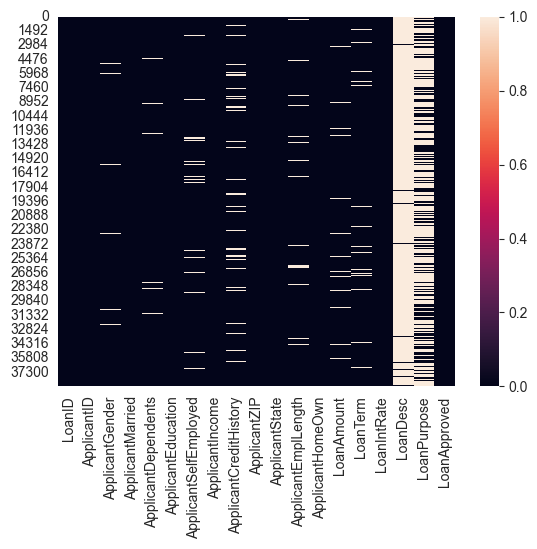

In [9]:
sns.heatmap(df.isnull())

data['ApplicantDependents'].value_counts().reset_index().rename(columns={'index' : 'ApplicantDependents' , 'ApplicantDependents' : 'counts'})



data['ApplicantEmplLength'].value_counts().reset_index().rename(columns={'index' : 'ApplicantEmplLength' , 'ApplicantEmplLength' : 'counts'})

data['ApplicantGender'].value_counts().reset_index().rename(columns={'index' : 'ApplicantGender' , 'ApplicantGender' : 'counts'})

data['LoanAmount'].value_counts().reset_index().rename(columns={'index' : 'LoanAmount' , 'LoanAmount' : 'counts'})

data['ApplicantHomeOwn'].value_counts().reset_index().rename(columns={'index' : 'ApplicantHomeOwn' , 'ApplicantHomeOwn' : 'counts'})

data['ApplicantEducation'].value_counts().reset_index().rename(columns={'index' : 'ApplicantEducation' , 'ApplicantEducation' : 'counts'})

data['ApplicantState'].value_counts().reset_index().rename(columns={'index' : 'ApplicantState' , 'ApplicantState' : 'counts'})

data['ApplicantZIP'].value_counts().reset_index().rename(columns={'index' : 'ApplicantZIP' , 'ApplicantZIP' : 'counts'})

ct = pd.crosstab(data['ApplicantGender'], data['LoanApproved'])
ct.plot(kind='bar', stacked=True , color=['#FF3030','#7FFFD4'])
plt.xlabel('ApplicantGender')
plt.ylabel('LoanApproved')
plt.title('Relationship between Years in Applicant Gender   and Loan Approved')

ct = pd.crosstab(data['ApplicantHomeOwn'], data['LoanApproved'])
ct.plot(kind='bar', stacked=True , color=['#FF3030','#7FFFD4'])
plt.xlabel('ApplicantHomeOwn')
plt.ylabel('LoanApproved')
plt.title('Relationship between Years in Applicant House  Own and Loan Approved')

data.head()

data.tail(25)

Aggregating Data

income_aggregation = data.groupby('LoanApproved')['ApplicantIncome'].agg(['mean', 'median', 'count'])

display(income_aggregation)

loan_amunt_aggregation = data.groupby('ApplicantDependents')['LoanAmount'].agg(['sum','mean','count'])

display(loan_amunt_aggregation)

loan_city_aggregation = data.groupby('ApplicantZIP')['LoanAmount'].agg(['min', 'max'])
display(loan_city_aggregation)

Sampling

data_sample = data.sample(frac=0.3, random_state=42)

data_sample.shape

Data cleaning and transformation

#convert Applicant Dependents to numeric values 
data_sample['ApplicantDependents'] = data_sample['ApplicantDependents'].replace({
    '0 oseb': 0, '1 oseba': 1, '2 osebi': 2, '3+ osebe': 3
}).astype('float')

data_sample['ApplicantZIP'] = data_sample['ApplicantZIP'].str.replace('xx', '').astype(int)

print(data_sample[['ApplicantZIP']].head())

data_sample

# standardize 'ApplicantEmplLength' by capturing numbers and converting "< 1 leto" as 0.5
def clean_employment_length(value):
    if isinstance(value, str):
        match = re.search(r"(\d+)", value)
        if match:
            return float(match.group(1))
        elif "< 1" in value:
            return 0.5
    return value


data_sample['ApplicantEmplLength'] = data_sample['ApplicantEmplLength'].apply(clean_employment_length).astype('float')
data_sample

#covert 'LoanIntRate' to float by removing % symbol 
data_sample['LoanIntRate']= data_sample['LoanIntRate'].str.replace('%','').astype('float')
data_sample

#fill missing categorical values with mode
for column in ['ApplicantGender', 'ApplicantMarried', 'ApplicantSelfEmployed', 'ApplicantCreditHistory']:
    data_sample[column].fillna(data_sample[column].mode()[0], inplace=True)


#fill numeric columns with median values 
for column in ['LoanAmount', 'LoanTerm','ApplicantDependents', 'ApplicantEmplLength']: 
    data_sample[column].fillna(data_sample[column].median(), inplace=True)

data_sample['LoanPurpose'].fillna('Unknown', inplace=True)

data_sample.drop(columns=['LoanDesc'], inplace=True)

print("Remaining Missing Values:", data_sample.isnull().sum())
print("Data Types:", data_sample.dtypes)

# Binning 'ApplicantIncome' into categories (low, medium, high income)
income_bins = [0, 2500, 5000, 10000, data_sample['ApplicantIncome'].max()]
income_labels = ['Low', 'Medium', 'High', 'Very High']
data_sample['IncomeLevel'] = pd.cut(data_sample['ApplicantIncome'], bins=income_bins, labels=income_labels)

# Binarization: Convert LoanApproved to 0 and 1
data_sample['LoanApproved'] = data_sample['LoanApproved'].replace({'Y': 1, 'N': 0})

# Discretizing 'LoanTerm' into short, medium, long-term categories
term_bins = [0, 60, 90, 120]  # Bin edges for Loan Term
term_labels = ['Short', 'Medium', 'Long']
data_sample['LoanTermCategory'] = pd.cut(data_sample['LoanTerm'], bins=term_bins, labels=term_labels)

# Transform categorical data into binary format using one-hot encoding
df =pd.get_dummies(data_sample, columns=['ApplicantGender', 'ApplicantMarried', 
                                     'ApplicantEducation', 'ApplicantSelfEmployed', 'ApplicantHomeOwn'
                                     ], drop_first=True)

print(df['ApplicantState'].unique())
#since the applicant state column has a this ['SI' 'si' 'Slovenija' 'Slo' 'slo'] dropping this column is a reasonable choice to simplify the dataset without losing any critical information

df.drop(columns=['ApplicantState'], inplace=True)

# Final Validation
remaining_missing_values = data_sample.isnull().sum()
data_types = data_sample.dtypes

print("Remaining Missing Values:\n", remaining_missing_values[remaining_missing_values > 0])
print("\nData Types:\n", data_types)

df.head()

In [45]:
# df.drop(labels=['LoanID','ApplicantID'], axis=1, inplace=True)

In [ ]:
# # 'LoanPurpose' categories
# loan_purpose_mapping = {
#     'Unknown': 0,
#     'kartica': 1,
#     'zdravljenje': 2,
#     'drugo': 3,
#     'prenova': 4,
#     'investicija': 5,
#     'stanovanje': 6,
#     'selitev': 7,
#     'poèitnice': 8,
#     'obnovljivi_viri': 9
# }
# 
# df['LoanPurpose'] = df['LoanPurpose'].map(loan_purpose_mapping)
# df['LoanPurpose'] = df['LoanPurpose'].astype(int)